In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.signal as sig

In [ ]:
roundimage = plt.imread('roundImage.png')

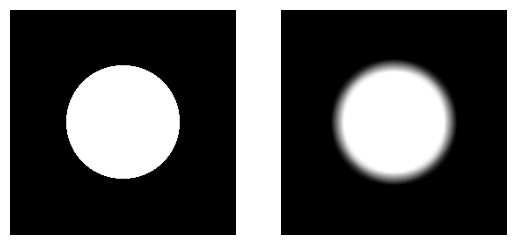

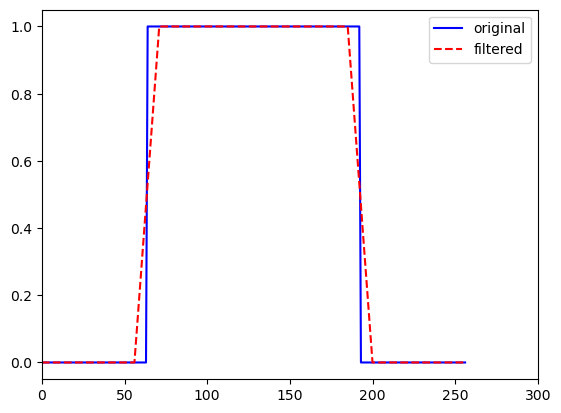

'\n필터는 경계선 주변 픽셀들의 밝기를 평균내어져서 빨간 선이 상대적으로 부드러운 경사를 가진다.\n따라서 필터는 경계가 부드러워지도록 한다.\n'

In [ ]:
# a
#h = np.ones((15,15))
h = 1/225 * np.ones((15,15))
y = sig.convolve2d(roundimage, h, mode='same')

# b
plt.figure()
plt.subplot(1,2,1)
plt.imshow(roundimage, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.show()

# c
# Plot the intensity profiles along the central row of both images as illustrated below

H,W=roundimage.shape

plt.figure()
plt.plot(roundimage[H//2, :], 'b-', label='original')
plt.plot(y[H//2, :],'r--', label='filtered')
plt.legend()
plt.xlim(0,300)
#plt.ylim(0,300)
plt.show()

# d
'''
필터는 경계선 주변 픽셀들의 밝기를 평균내어져서 빨간 선이 상대적으로 부드러운 경사를 가진다.
따라서 필터는 경계가 부드러워지도록 한다.
'''

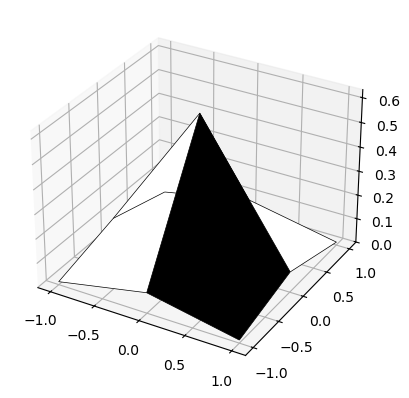

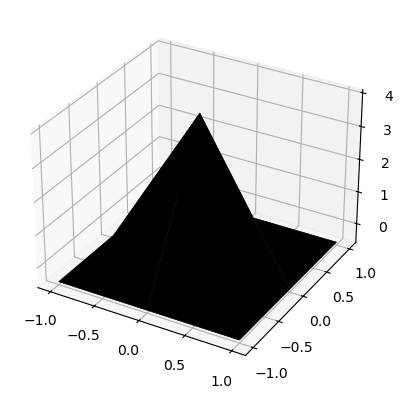

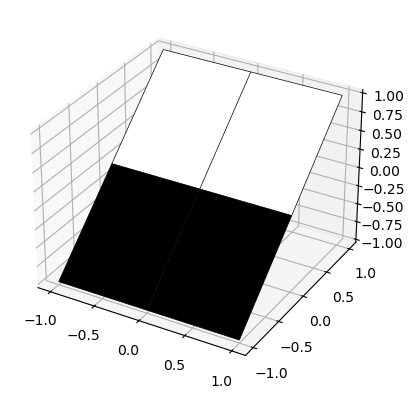

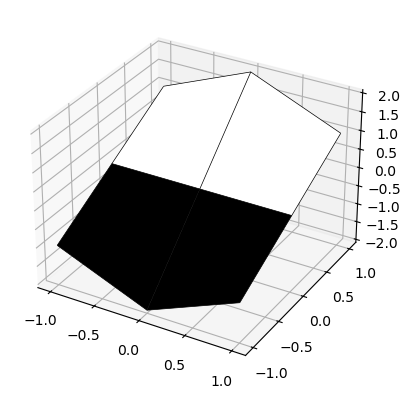

In [ ]:
def make_grid2d(size):
    grid = np.linspace(-(size//2), (size//2), size)
    xx,yy = np.meshgrid(grid, grid)
    return xx,yy

def surface_plot(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x,y,z, cmap='gray')
    ax.plot_wireframe(x,y,z, color='k', linewidth=0.5)
    plt.show()

# 3.a) Generate a 3x3 Gaussian filter with a standard deviation of 0.5. 
size=3; sigma=0.5
xx,yy = make_grid2d(size)
gaussian_mask = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
gaussian_mask /= np.sum(gaussian_mask)
surface_plot(xx,yy,gaussian_mask)
'''
# a) Generate a 3x3 Gaussian filter with a standard deviation of 0.5. 
def make_gaussain_mask2d(size, sigma):
    xx,yy = make_grid2d(size)
    mask2d = np.exp(-(xx**2 + yy**2) / (2*sigma**2))
    mask2d /= np.sum(mask2d)
    return mask2d
'''

# 3.b) Generate a 3x3 Laplacian filter with a center value of 4. 
xx,yy = make_grid2d(size)
laplacian_mask = np.array([[-0.5,-0.5,-0.5],[-0.5,4,-0.5],[-0.5,-0.5,-0.5]])
#laplacian_mask /= np.sum(laplacian_mask)
surface_plot(xx,yy,laplacian_mask)

# 3.c) Generate a 3x3 Prewitt filter for detecting vertical edges. 
xx,yy = make_grid2d(size)
prewitt_mask = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
#prewitt_mask /= np.sum(prewitt_mask)
surface_plot(xx,yy,prewitt_mask)

# 3.d) Generate a 3x3 Sobel filter for detecting vertical edges. 
xx,yy = make_grid2d(size)
sobel_mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
#sobel_mask /= np.sum(sobel_mask)
surface_plot(xx,yy,sobel_mask)

# For each filter, display its 3D surface plot. 

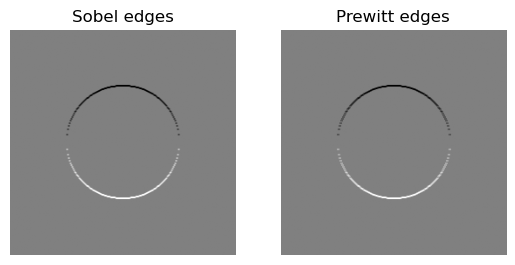

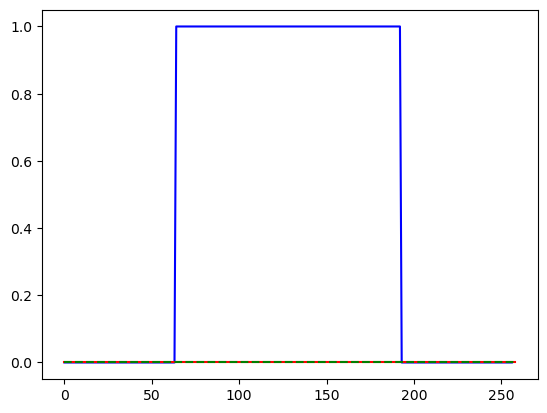

In [ ]:
# Sobel and Prewitt are basic high-pass filters with directional sensitivity. 

# 4.a) Apply the Sobel and Prewitt filters from step 3 to the input image.
# Show the filtered images and plot the horizontal center intensity profiles
#     of the original image and both filtered outputs.
# Plot the vertical center profiles in a separate figure. 
h_S = sobel_mask
h_P = prewitt_mask

y_S = sig.convolve2d(roundimage, h_S)
y_P = sig.convolve2d(roundimage, h_P)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(y_S, cmap='gray')
plt.axis('off')
plt.title('Sobel edges')

plt.subplot(1,2,2)
plt.imshow(y_P, cmap='gray')
plt.axis('off')
plt.title('Prewitt edges')

plt.show()


plt.figure()
H,W=roundimage.shape
plt.plot(roundimage[H//2, :], 'b-')
plt.plot(y_S[H//2, :],'r')
plt.plot(y_P[H//2, :], 'g--')
#plt.xlim(0,300)
#plt.ylim(0,300)
plt.show()

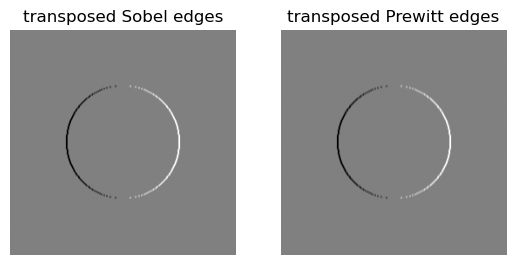

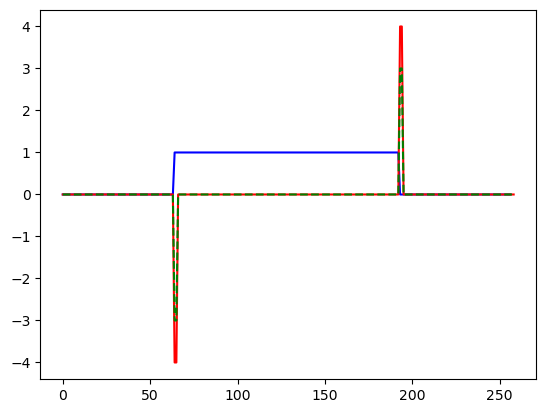

In [ ]:
y_S_T = sig.convolve2d(roundimage, h_S.T)
y_P_T = sig.convolve2d(roundimage, h_P.T)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(y_S_T, cmap='gray')
plt.axis('off')
plt.title('transposed Sobel edges')

plt.subplot(1,2,2)
plt.imshow(y_P_T, cmap='gray')
plt.axis('off')
plt.title('transposed Prewitt edges')

plt.show()


plt.figure()
plt.plot(roundimage[H//2, :], 'b-')
plt.plot(y_S_T[H//2, :],'r')
plt.plot(y_P_T[H//2, :], 'g--')
#plt.xlim(0,300)
#plt.ylim(0,300)
plt.show()

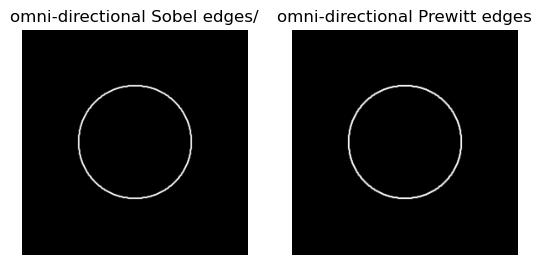

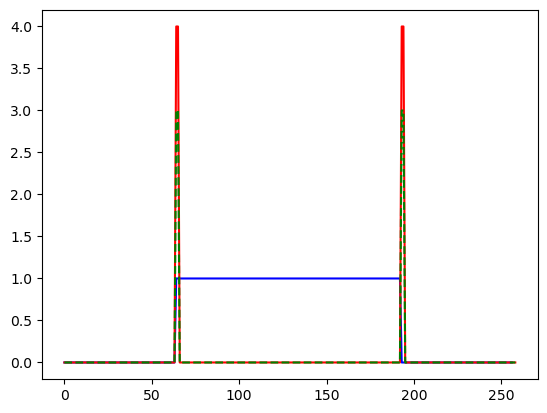

In [ ]:
# 4.c) Combine the outputs from (a) and (b) to extract omni-directional edges.
# Display the resulting images and their intensity profiles. 
y_S_combined = np.sqrt(y_S**2 + y_S_T**2)
y_P_combined = np.sqrt(y_P**2 + y_P_T**2)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(y_S_combined, cmap='gray')
plt.axis('off')
plt.title('omni-directional Sobel edges/')

plt.subplot(1,2,2)
plt.imshow(y_P_combined, cmap='gray')
plt.axis('off')
plt.title('omni-directional Prewitt edges')

plt.show()


plt.figure()
plt.plot(roundimage[H//2, :], 'b-')
plt.plot(y_S_combined[H//2, :],'r')
plt.plot(y_P_combined[H//2, :], 'g--')
#plt.xlim(0,300)
#plt.ylim(0,300)
plt.show()

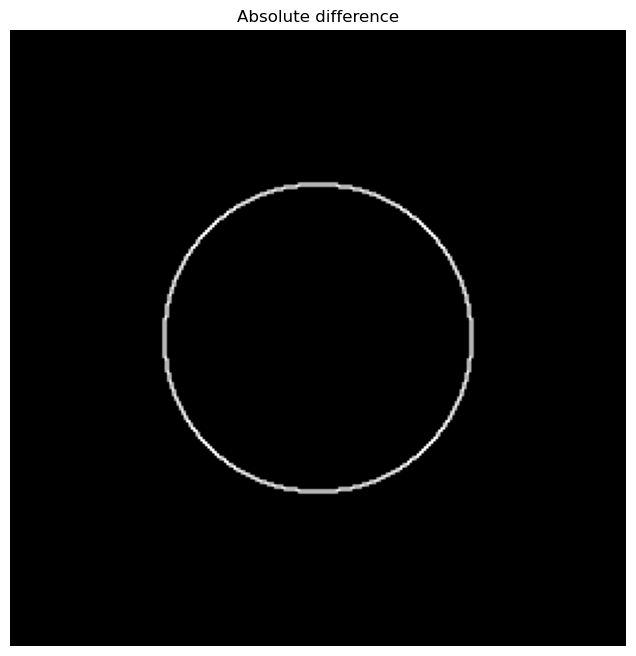

In [ ]:
# 4.d) Compute and display the difference image by taking the absolute difference
# between the two output images from (c). 
difference_image = np.abs(y_S_combined - y_P_combined)
plt.figure(figsize=(8,8))
plt.imshow(difference_image, cmap='gray')
plt.axis('off')
plt.title('Absolute difference')
plt.show()

In [ ]:
# 5.a) Load the image file ‘chest.png’. 
chestimage = plt.imread('chest.png')

In [ ]:
# 5.b) Apply the Laplacian filter created in step 3.b to the chest image. 
y_L = sig.convolve2d(chestimage, laplacian_mask, mode='same')

In [ ]:
# 5.c) Use the Laplacian filter output to enhance the sharpness of the original chest image. 
sharpened_image = chestimage + (4*y_L)

Text(0.5, 1.0, 'sharpened')

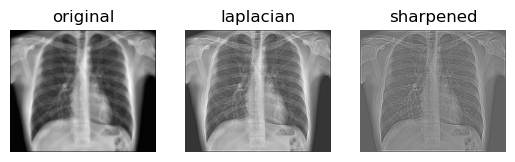

In [ ]:
# 5.d) Display the original, the Laplacian-filtered, and the sharpened images side by side. 
plt.figure()
plt.subplot(1,3,1)
plt.imshow(chestimage, cmap='gray'); plt.axis('off'); plt.title('original')

plt.subplot(1,3,2)
plt.imshow(chestimage+y_L, cmap='gray'); plt.axis('off'); plt.title('laplacian')
plt.subplot(1,3,3)
plt.imshow(sharpened_image, cmap='gray'); plt.axis('off'); plt.title('sharpened')